# Classify cancer cells using convolutional neural network

In this project I wanted to see if I can use fastai library to build a convolutional neural network model for classifying cancer cells.

In [1]:
# Import all the necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate


In [ ]:
# # since the images are downloaded in a zipfile we need to first unzip it into the right folder
# from zipfile import ZipFile
# with ZipFile('dataset.zip', 'r') as zf:
#      zf.extractall('/data_images')

In [20]:
bs=9
path = Path('./data') #specify the path containing the folder
classes = ['MDA-MB-231','MCF-10A','MCF-7'] # these act as our labels for images
np.random.seed(42)

# then we load the data using the ImageDataBunch class
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=bs,
                                  ds_tfms=get_transforms(), size=480, num_workers=4).normalize(imagenet_stats)


['MCF-10A', 'MCF-7', 'MDA-MB-231']


(3, 3)

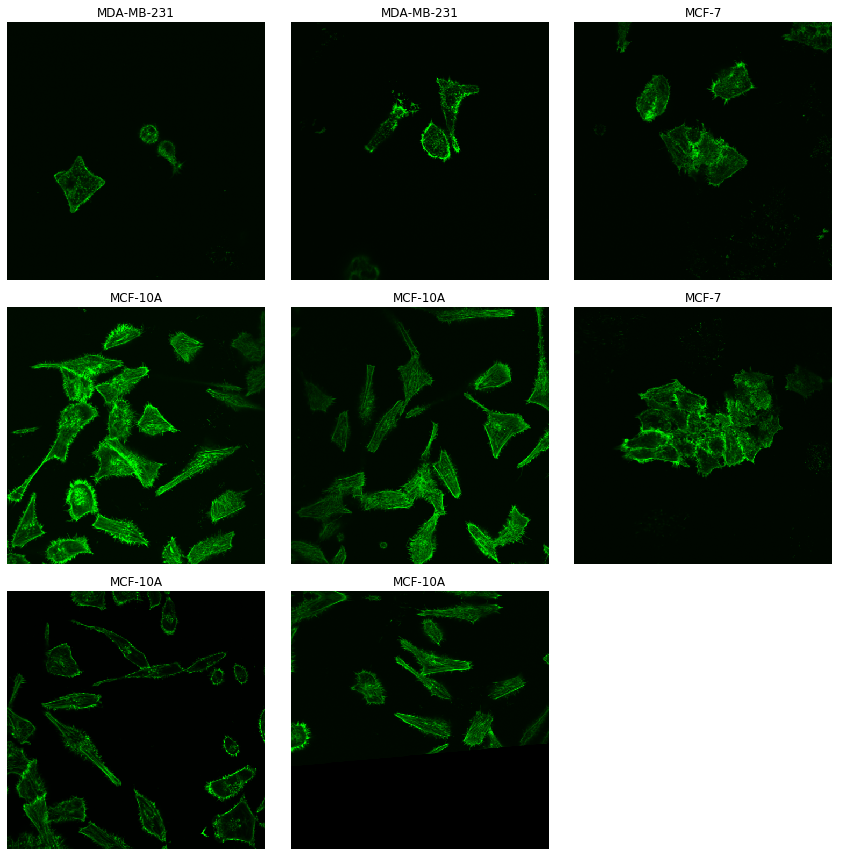

In [4]:
# we check if the images have been loaded and labeled properly
data.show_batch(3, figsize=(12,12), hide_axis=True)
print(data.classes)
len(data.classes),data.c

In [5]:
# We create an instance of our CNN learner, by calling it on our data
# we will be using resnet34, and our metrics will be error rate
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

# We have to decide how many times we would like the images to be presented to the model
# we can begin with just 3 epoch to see how well it can perform with our data
learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,error_rate,time
0,0.554643,0.209519,0.072727,11:08
1,0.303223,0.072273,0.036364,11:24
2,0.206180,0.041014,0.018182,11:49


Even though the model performed well, we can certainly do better. In order to do that we need to check the confusion matrix to understand where the model is incorrectly labeling our images. We can do this in fastai with just 2 lines of code.

In [7]:
# we want to look at the images to figure out if there was any specific reason why the images where missclassified
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)


True

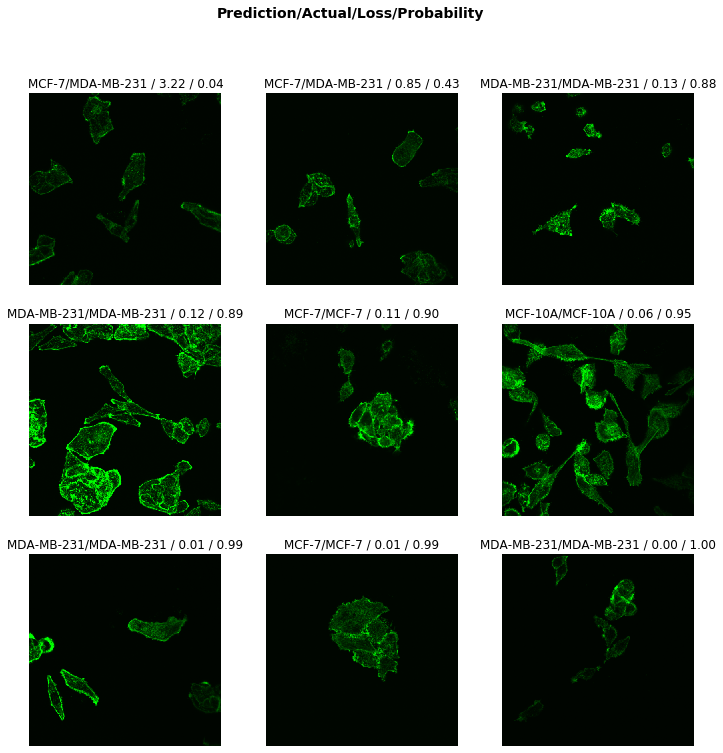

In [9]:
# plots the images
interp.plot_top_losses(9, figsize=(12,12))

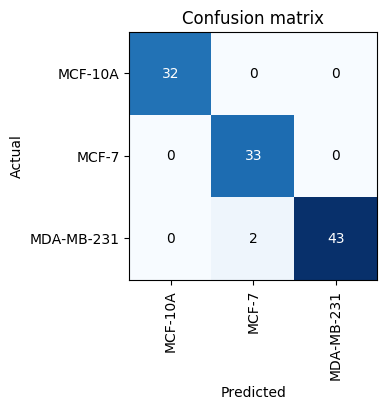

In [10]:
# create a variable interp which has the interpretation values for our model
interp.plot_confusion_matrix(figsize=(6,4), dpi=100)

In [11]:
interp.most_confused(min_val=2)

[('MDA-MB-231', 'MCF-7', 2)]

In [12]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.536329,0.308827,0.090909,16:15


In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


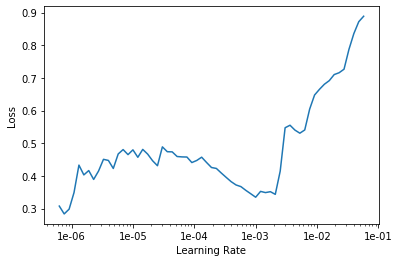

In [17]:
learn.recorder.plot()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))
   

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: DataLoader worker (pid(s) 1083, 1084, 1085, 1086) exited unexpectedly

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(6,4), dpi=100);